### SA on sentences w/ medication
http://textminingonline.com/dive-into-nltk-part-ix-from-text-classification-to-sentiment-analysis

In [1]:
# Trained with nltk movie_reviews

In [2]:
import nltk
from nltk.corpus import movie_reviews
from random import shuffle
from nltk import tokenize
from nltk.tokenize import TweetTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import pandas as pd
import gensim
import nltk
import numbers
from nltk.sentiment.vader import SentimentIntensityAnalyzer

tknzr = TweetTokenizer()

/Users/elenajia/anaconda/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [4]:
documents = [(list(movie_reviews.words(fileid)), category) 
for category in movie_reviews.categories()
for fileid in movie_reviews.fileids(category)]

In [5]:
shuffle(documents)

In [6]:
print (documents[0])

(['by', 'the', 'time', 'dennis', 'quaid', ',', 'the', 'ostensible', 'star', 'of', 'switchback', ',', 'makes', 'his', 'first', 'appearance', 'at', 'about', 'the', '22', '-', 'minute', 'mark', ',', 'you', 'may', 'find', 'yourself', 'wondering', 'why', 'he', 'bothered', '.', 'after', 'all', ',', 'writer', '/', 'director', 'jeb', 'stuart', 'has', 'already', 'set', 'up', 'a', 'fairly', 'promising', 'pair', 'of', 'parallel', 'story', 'lines', '.', 'the', 'first', 'finds', 'amarillo', ',', 'texas', 'sheriff', 'buck', 'olmstead', '(', 'r', '.', 'lee', 'ermey', ')', 'facing', 'a', 'hotly', '-', 'contested', 'election', 'battle', 'just', 'as', 'a', 'brutal', 'double', 'homicide', 'is', 'discovered', 'at', 'a', 'motel', 'in', 'his', 'jurisdiction', '.', 'as', 'olmstead', 'begins', 'his', 'investigation', ',', 'we', 'also', 'meet', 'the', 'two', 'men', 'who', 'come', 'to', 'be', 'our', 'prime', 'suspects', '.', 'lane', 'dixon', '(', 'jared', 'leto', ')', 'is', 'an', 'enigmatic', 'young', 'hitchhik

In [7]:
len(documents)

2000

In [8]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())

In [9]:
# word_features = all_words.keys()[:2000]
word_features = list(all_words.keys())[:2000]

In [10]:
# len(featuresets)

In [11]:
# print (document_features(movie_reviews.words('pos/cv957_8737.txt')))

In [12]:
featuresets = [(document_features(d), c) for (d, c) in documents]

In [13]:
train_set, test_set = featuresets[100:], featuresets[:100]

In [14]:
# classifier = nltk.NaiveBayesClassifier.train(train_set)

full_classifier = nltk.NaiveBayesClassifier.train(featuresets)

In [15]:
print (nltk.classify.accuracy(full_classifier, test_set))

0.9


In [16]:
# classifier.show_most_informative_features(10)

### test

In [17]:
df1 = pd.read_csv('s_thrpy.csv')

In [19]:
df1

,Unnamed: 0,thrpy_sentence
0,0,I have been recently diagnosed and have just s...
1,1,I am having an issue concerning my therapist.
2,2,On one hand I feel I should share this informa...
3,3,I've tried medications but they only made me f...
4,4,I think I might have social anxiety (but since...
5,5,"I've been through my share of doctors, therapy..."
6,6,"I didn't really like going to therapy, I felt ..."
7,7,I've been going to another therapist I kind of...
8,8,I've talked to my mom about it and she says th...
9,9,I scheduled a GP appointment last week and he ...


In [20]:
sent_a = list(df1['thrpy_sentence'].values)

In [21]:
res_s_dic = []
# res_s_dic1 = []

df_res_s = pd.DataFrame([])

sid = SentimentIntensityAnalyzer()

for i, sentence in enumerate(sent_a[:5000]):
    test_set = document_features(tknzr.tokenize(sentence))  #TODO: change to tokenize
    # res_s_dic1.append(classifier.classify(test_set))
    
    prob_result = full_classifier.prob_classify(test_set)
    
    #     dic = {}
    #     dic["s"] = sentence
    #     dic["neg"] = prob_result.prob("neg")
    #     dic["pos"] = prob_result.prob("pos")
    
    # res_s_dic.append(dic)
    df_res_s.loc[i,'neg_prob'] = prob_result.prob("neg")
    df_res_s.loc[i,'pos_prob'] = prob_result.prob("pos")
    
    sid_s = sid.polarity_scores(sentence)
    df_res_s.loc[i,'neg_vader'] = sid_s['neg']
    df_res_s.loc[i,'neu_vader'] = sid_s['neu']
    df_res_s.loc[i,'pos_vader'] = sid_s['pos']
    
    df_res_s.loc[i,'sentence'] = sentence
    
# df_res_s[df_res_s['pos_prob'] > .001]['sentence']
print(df_res_s['pos_prob'].max())
print(df_res_s['pos_vader'].max())
df_res_s.to_csv('s_thrpy_with_score_first5000.csv')
print (df_res_s)

0.749152328441
0.675
      neg_prob  pos_prob  neg_vader  neu_vader  pos_vader  \
0     0.999987  0.000013      0.000      1.000      0.000   
1     0.999968  0.000032      0.000      1.000      0.000   
2     0.999820  0.000180      0.154      0.714      0.132   
3     0.999837  0.000163      0.081      0.791      0.128   
4     0.999909  0.000091      0.086      0.914      0.000   
5     0.999791  0.000209      0.155      0.714      0.131   
6     0.999818  0.000182      0.337      0.663      0.000   
7     0.999853  0.000147      0.000      0.833      0.167   
8     0.999736  0.000264      0.000      1.000      0.000   
9     0.999171  0.000829      0.251      0.749      0.000   
10    0.999781  0.000219      0.042      0.595      0.363   
11    0.999786  0.000214      0.243      0.757      0.000   
12    0.999728  0.000272      0.069      0.931      0.000   
13    0.999978  0.000022      0.000      1.000      0.000   
14    0.995342  0.004658      0.095      0.905      0.000   
15 

In [22]:
prob_result = full_classifier.prob_classify(document_features(tknzr.tokenize(str('I love it! This is great!!!'))))
print(prob_result.prob("neg"), prob_result.prob("pos"))


0.9999248550133579 7.51449866528843e-05


In [23]:
# df_res_s = pd.DataFrame(res_s_dic)
# print (df_res_s)

# df_res_s.to_csv('s_med_with_score_first100.csv')

In [24]:
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

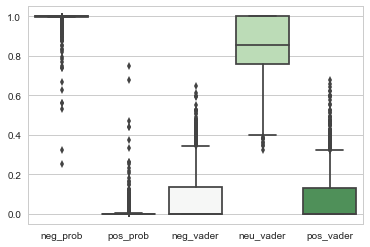

In [25]:
ax = sns.boxplot(data = df_res_s,palette = "PRGn")

#### posts

In [26]:
df2 = pd.read_csv('p_thrpy.csv')

In [27]:
post_a = list(df2['selftext'].values)

In [ ]:
res_p_dic = []

df_res_p = pd.DataFrame([])


for i, post in enumerate(post_a[:5000]):
    
    test_set = document_features(tknzr.tokenize(str(post)))  #TODO: change to tokenize
    # res_s_dic1.append(classifier.classify(test_set))
    
    prob_result = full_classifier.prob_classify(test_set)
    
    #     dic = {}
    #     dic["s"] = sentence
    #     dic["neg"] = prob_result.prob("neg")
    #     dic["pos"] = prob_result.prob("pos")
    
    # res_s_dic.append(dic)
    df_res_p.loc[i,'neg_prob'] = prob_result.prob("neg")
    df_res_p.loc[i,'pos_prob'] = prob_result.prob("pos")
    
    sid_p = sid.polarity_scores(str(post))
    df_res_p.loc[i,'neg_vader'] = sid_p['neg']
    df_res_p.loc[i,'neu_vader'] = sid_p['neu']
    df_res_p.loc[i,'pos_vader'] = sid_p['pos']
    
    df_res_p.loc[i,'post'] = post
    
    
# df_res_s[df_res_s['pos_prob'] > .001]['sentence']
print(df_res_p['pos_prob'].max())
print(df_res_p['pos_vader'].max())
df_res_p.to_csv('p_thrpy_with_score_first5000.csv')
print (df_res_p)



In [ ]:
ax_2 = sns.boxplot(data= df_res_p,palette="PRGn")